# Sistema presa depredador (Lotka-Volterra)

Las ecuaciones de Lotka-Volterra, también conocidas como ecuaciones predador-presa o presa-predador, son un par de ecuaciones diferenciales de primer orden no lineales que se usan para describir dinámicas de sistemas biológicos en el que dos especies interactúan, una como presa y otra como depredador. Las ecuaciones fueron propuestas de forma independiente por Alfred J. Lotka en 1925 y Vito Volterra en 1926. Tales ecuaciones se definen como:



$$
\begin{aligned}
\frac{dx(t)}{dt} &= 
\alpha  x(t)-\beta x(t)y(t)\\
\frac{dy(t)}{dt} &= \left(\gamma -y(t) +\delta x(t)y(t)\right)
\end{aligned}
$$


donde:

$y$ es el número de algún predador (por ejemplo, un lobo);
$x$ es el número de sus presas (por ejemplo, conejos);
$\dfrac{dy}{dt}$ y $\dfrac{dx}{dt}$ representa el crecimiento de las dos poblaciones en el tiempo;
$t$ representa el tiempo; y $\alpha$ , $\beta$, $\gamma$ y $\delta$ son parámetros (positivos) que representan las interacciones de las dos especies.

## Explicación de las ecuaciones

Usando las series de Taylor se obtiene una solución lineal a las ecuaciones:

$$f(x,y)=A_{0}-A_{1}x-A_{2}y$$ 

$$g(x,y)=B_{0}+B_{1}x-B_{2}y$$

Con estos coeficientes se puede estudiar los modelos de competición, enfermedad y mutualismo (biología) en un ecosistema.

## Presa
$$\frac{dx}{dt}=\alpha x-\beta xy$$

Se asume que las presas tienen suministro de comida ilimitado por tiempo definido, y se reproducen exponencialmente a menos que exista algún predador. Este crecimiento exponencial está representado en la ecuación por el término $\alpha x$. El término de la ecuación $\beta xy$ viene a representar el encuentro de las dos especies y su interacción. Si $x$ o $y$ son cero no existe interacción.

Se puede interpretar la ecuación como el cambio del número de presas viene dado por su propio crecimiento menos la tasa de encuentros con predadores.

## Depredador
$$\frac{dy}{dt}=\delta xy-\gamma y$$

En esta ecuación, $\delta xy$ representa el crecimiento de los depredadores (fíjese en la similitud con la ecuación para las presas, pero en este caso para el crecimiento de los depredadores es necesario usar la razón a la que se consumen las presas, $x$. $\gamma y$ representa la muerte natural de los depredadores de forma exponencial; a más depredadores es necesario que el número de víctimas o presa aumente para mantener la población.

Se puede interpretar la ecuación como el crecimiento de los depredadores por la caza de presas menos la muerte natural de estos.

## Simulación numérica

In [1]:
import numpy as np
import scipy.integrate as integ
import matplotlib.pyplot as plt

In [2]:
alpha=0.1 #0.1 tasa de crecimiento de conejos por mes por conejo
beta=0.005 #  éxito en la caza del depredador por producto presa depredador
gamma=0.04 # tasa de crecimiento de zorros por zorro
delta=0.00004 #  éxito en la caza y cuánto alimenta cazar una presa al depredador

def LotkaVolterra(t, v):
    x,y = v
    dxdt = alpha*x-beta*x*y
    dydt = delta*x*y - gamma*y
    return dxdt, dydt

In [3]:
x0 = 2000 #2000 conejos inicialmente
y0 = 10 #zorros inicialmente
v0 = x0,y0

tspan = (0, 500)
t = np.linspace(*tspan, 2000)

r = integ.solve_ivp(LotkaVolterra, tspan, v0, t_eval=t)

In [4]:
x,y=r.y
r

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 326
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 2.50125063e-01, 5.00250125e-01, ...,
       4.99499750e+02, 4.99749875e+02, 5.00000000e+02])
 t_events: None
        y: array([[2000.        , 2025.04138054, 2050.13061624, ...,  214.92485945,
         216.03299361,  217.18056984],
       [  10.        ,   10.1018171 ,   10.20723035, ...,   15.95026332,
          15.82555904,   15.70200576]])
 y_events: None

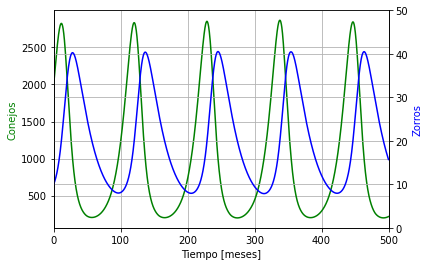

In [5]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(t, x, 'g-')
ax2.plot(t, y, 'b-')
ax1.set_xlabel('Tiempo [meses]')
ax1.set_ylabel('Conejos', color='g')
plt.ylim((0,2500))
ax2.set_ylabel('Zorros', color='b')
plt.xlim((0,500))
plt.ylim((0,50))
ax1.grid()
ax2.grid()
plt.show()